<a href="https://colab.research.google.com/github/ShedovaNastya/Introduction-in-ML/blob/main/4_1%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8CMNIST_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Нейросеть имеет следующие характеристики
- Датасет: MNIST
- Размер train выборки: 60000
- Размер test выборки: 10000
- Количество скрытых слоев: 3
- Количество нейронов в скрытых слоях: 250
- Функция активации: Сигмоида
- Функция потерь: Кросс Энтропия
- Размер батча = 2000
- Количество эпох: 200
- optimizer = RMSprop lr = 0.001


In [ ]:
import numpy as np
import torch
import torchvision.datasets
from tqdm import tqdm_notebook as tqdm

In [ ]:
# Загрузка датасета MNIST для обучения и тестирования
MNIST_train = torchvision.datasets.MNIST('./', download = True, train = True)
MNIST_test = torchvision.datasets.MNIST('./', download = True, train = False)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Получение данных и меток для обучения и тестирования
X_train = MNIST_train.data
X_test = MNIST_test.data
y_train = MNIST_train.targets.to(device)  # Перемещение меток на выбранное устройство
y_test = MNIST_test.targets.to(device)

# Преобразование данных в формат
X_train = X_train.float().reshape([-1, 28*28]).to(device)
X_test = X_test.float().reshape([-1, 28*28]).to(device)

# Определение функции потерь (кросс-энтропии)
loss = torch.nn.CrossEntropyLoss()


class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)  # Полносвязный слой
    self.act1 = torch.nn.Sigmoid()  # Функция активации сигмоида
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)  # Еще один полносвязный слой
    self.act2 = torch.nn.Sigmoid()  # Функция активации сигмоида
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 10)  # Выходной слой

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

# Создание экземпляра модели с 250 нейронами в скрытом слое
mnist_net = MNISTNet(250).to(device)

# Определение размера батча
batch_size = 2000

# Определение оптимизатора (RMSprop) с заданной скоростью обучения
optimizer =  torch.optim.RMSprop(mnist_net.parameters(), lr = 0.001)

# Инициализация списков для хранения точности и значений потерь на обучающем и тестовом наборах
acc_train, loss_train = [], []
acc_test, loss_test = [], []

In [ ]:
for epoch in tqdm(range(200), desc='процесс обучения'):
    # случайные батчи
    order = np.random.permutation(len(X_train))

    # Обучение по батчам
    for start_indexes in range(0, len(X_train), batch_size):
        optimizer.zero_grad()  # Обнуление градиентов перед началом нового батча

        # Выбор индексов для текущего батча
        batch_indexes = order[start_indexes:start_indexes + batch_size]

        # Выбор данных и меток для текущего батча
        X_train_batch = X_train[batch_indexes].to(device)
        y_train_batch = y_train[batch_indexes].to(device)


        preds = mnist_net.forward(X_train_batch)

        # Вычисление значения функции потерь
        loss_value = loss(preds, y_train_batch)
        loss_value.backward()  #backprop

        optimizer.step()  # Обновление весов модели

    # Прямой проход для всего обучающего и тестового наборов
    train_preds = mnist_net.forward(X_train)
    test_preds = mnist_net.forward(X_test)

    # Вычисление точности и значения потерь для обучающего набора
    acc_train.append((train_preds.argmax(dim=1) == y_train).float().mean().cpu().data)
    loss_train.append(loss(train_preds, y_train).item())

    # Вычисление точности и значения потерь для тестового набора
    acc_test.append((test_preds.argmax(dim=1) == y_test).float().mean().cpu().data)
    loss_test.append(loss(test_preds, y_test).item())

<ipython-input-9-2893643e7ef8>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(200), desc='процесс обучения'):


процесс обучения:   0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Точность модели = 0.9751999974250793train and test accuracy')

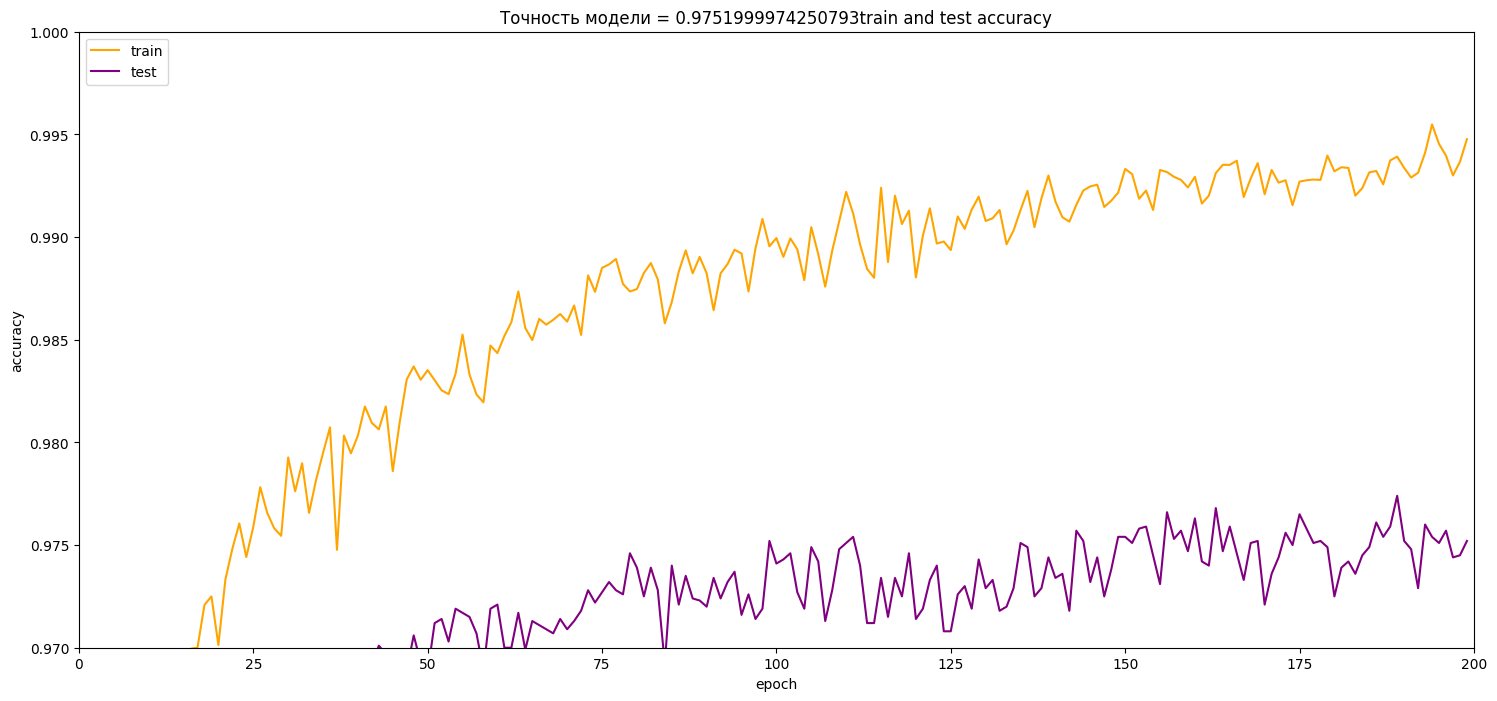

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 8.0)
plt.plot(range(200), acc_train, c = 'orange', label = 'train')
plt.plot(range(200) , acc_test, c = 'purple', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim(0,200)
plt.ylim(0.97, 1.0)
plt.legend(loc = 'upper left')
plt.title(f'Точность модели = {acc_test[-1]}train and test accuracy'.format(acc_test))


Text(0.5, 1.0, ' loss of train and test')

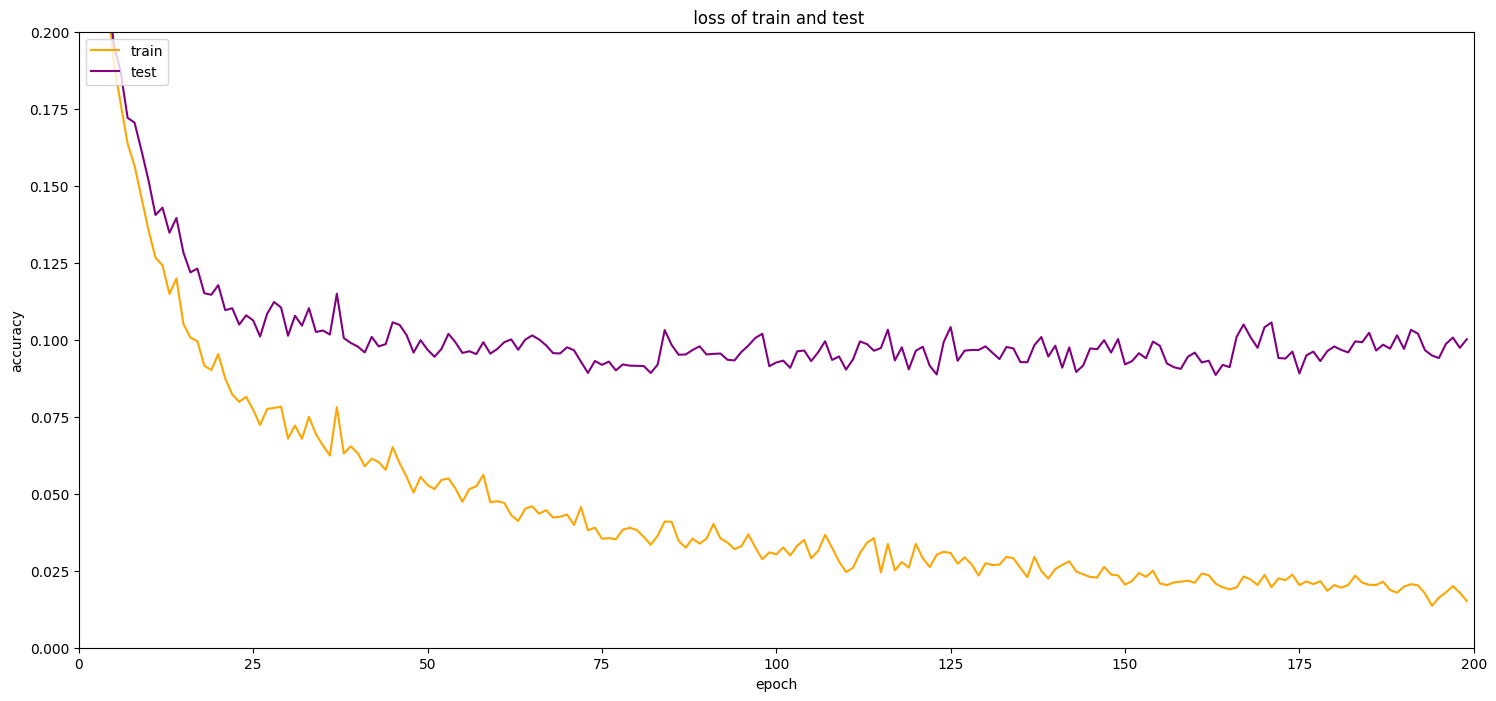

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 8.0)
plt.plot(range(200), loss_train, c = 'orange', label = 'train')
plt.plot(range(200) , loss_test, c = 'purple', label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc = 'upper left')
plt.xlim(0, 200)
plt.ylim(0, 0.2)
plt.title(' loss of train and test')

In [ ]:
print('Точность модели при 200 эпохах =', acc_test[199])

Точность модели при 200 эпохах = tensor(0.9752)
